In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("Breast_cancer_dataset.csv")

In [39]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [41]:
# Drop unnecessary columns 
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [42]:

# Encoding diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

In [43]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# Spliting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
model=LogisticRegression(random_state=42)
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [46]:
y_pred=model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [48]:

# Precision, Recall, ROC-AUC
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC-AUC: 0.99737962659679


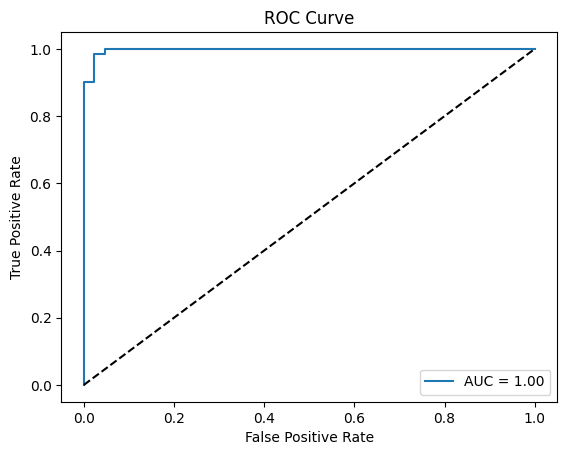

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [50]:
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)


In [51]:
print(confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))

[[41  2]
 [ 0 71]]
Precision: 0.9726027397260274
Recall: 1.0


In [52]:
threshold = 0.7
y_pred_custom2 = (y_proba >= threshold).astype(int)


In [53]:
print(confusion_matrix(y_test, y_pred_custom2))
print("Precision:", precision_score(y_test, y_pred_custom2))
print("Recall:", recall_score(y_test, y_pred_custom2))

[[42  1]
 [ 4 67]]
Precision: 0.9852941176470589
Recall: 0.9436619718309859


### Sigmoid Function
The sigmoid function is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- $z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$
- Output range: (0, 1), interpreted as probability.
- We compare this probability to a threshold (default = 0.5) to make a classification:
  - If $\sigma(z) \geq 0.5$ → predict **positive class**
  - If $\sigma(z) < 0.5$ → predict **negative class**

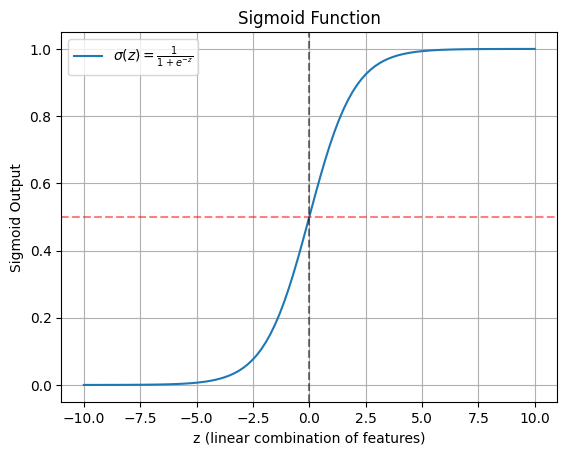

In [54]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Range of z values
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

# Plot
plt.plot(z, sig, label=r"$\sigma(z) = \frac{1}{1 + e^{-z}}$")
plt.axvline(0, color='k', linestyle='--', alpha=0.5)  # vertical line at z=0
plt.axhline(0.5, color='r', linestyle='--', alpha=0.5)  # probability 0.5
plt.xlabel("z (linear combination of features)")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()